## Problem Statement
### About the Dataset
- Age: Describes the age of individuals. Continuous.
- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Number of years spent in education. Continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Continuous.
- capital-loss: Continuous.
- hours-per-week: Continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
data = pd.read_csv('/Users/aakanksha/My_Codes/ML_Pipeline_Project/notebooks/data/adult.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.rename(columns={'education-num': 'education_num'}, inplace=True)
data.rename(columns={'marital-status': 'marital_status'}, inplace=True)
data.rename(columns={'capital-gain': 'capital_gain'}, inplace=True)
data.rename(columns={'capital-loss': 'capital_loss'}, inplace=True)
data.rename(columns={'hours-per-week': 'hours_per_week'}, inplace=True)

In [7]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data.shape

(32561, 15)

In [9]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [10]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
country           object
salary            object
dtype: object

In [11]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
# Assuming you have a DataFrame called 'df' and a column called 'column_name'
mode_value = data['occupation'].mode()

# Replace the unique value with the median
data['occupation'].replace("?", 'mode_value', inplace=True)

In [13]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

In [15]:
data.duplicated().sum()

24

In [16]:
data = data.drop_duplicates()

In [17]:
data.duplicated().sum()

0

In [18]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [20]:
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

In [21]:
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [22]:
for i in categorical_features:
    print(i, data[i].unique())
    
    print()
    print("*********************************Seperated_columns****************************")
    print()

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

*********************************Seperated_columns****************************

education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

*********************************Seperated_columns****************************

marital_status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

*********************************Seperated_columns****************************

occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

****************

In [23]:
data['workclass'].mode()[0]

' Private'

In [24]:
data['occupation'].mode()[0]

' Prof-specialty'

In [25]:
data['country'].mode()[0]

' United-States'

In [27]:
data['workclass'] = data['workclass'].replace("?", ' Private') 
data['occupation'] = data['occupation'].replace("?", ' Prof-specialty')
data['country'] = data['country'].replace("?", ' United-States')

In [28]:
for i in categorical_features:
    print(i, data[i].unique())
    
    print()
    print("*********************************Seperated_columns****************************")
    print()

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

*********************************Seperated_columns****************************

education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

*********************************Seperated_columns****************************

marital_status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

*********************************Seperated_columns****************************

occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

****************

In [32]:
for i in numerical_features:
    print(i, data[i].unique())
    
    print()
    print("*********************************Seperated_columns****************************")
    print()

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

*********************************Seperated_columns****************************

fnlwgt [ 77516  83311 215646 ...  34066  84661 257302]

*********************************Seperated_columns****************************

education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

*********************************Seperated_columns****************************

capital_gain [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  

In [ ]:
## Data Visualization

#visualizing categorical_features using countplot

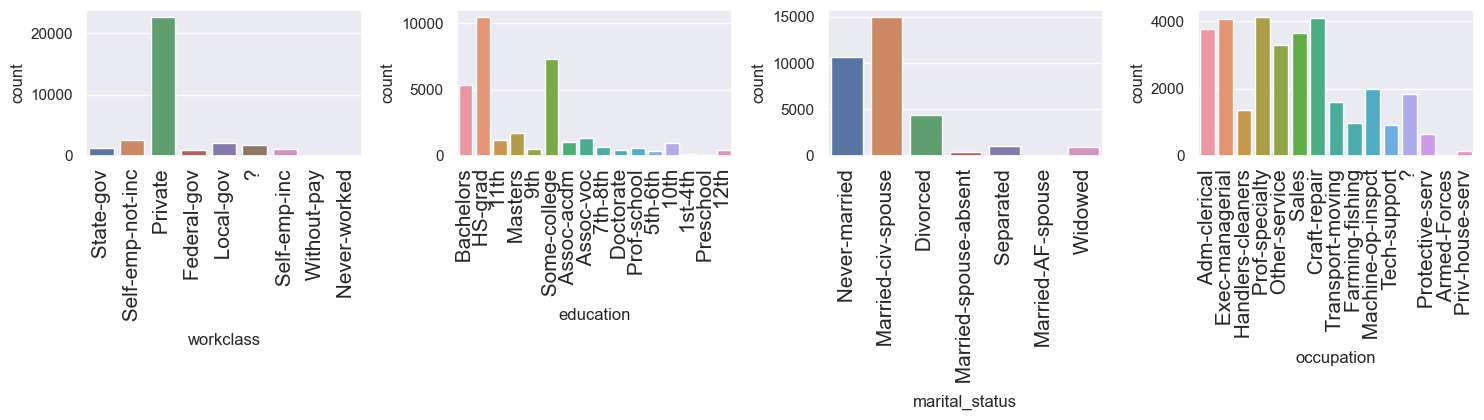

In [33]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['workclass', 'education', 'marital_status', 'occupation']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

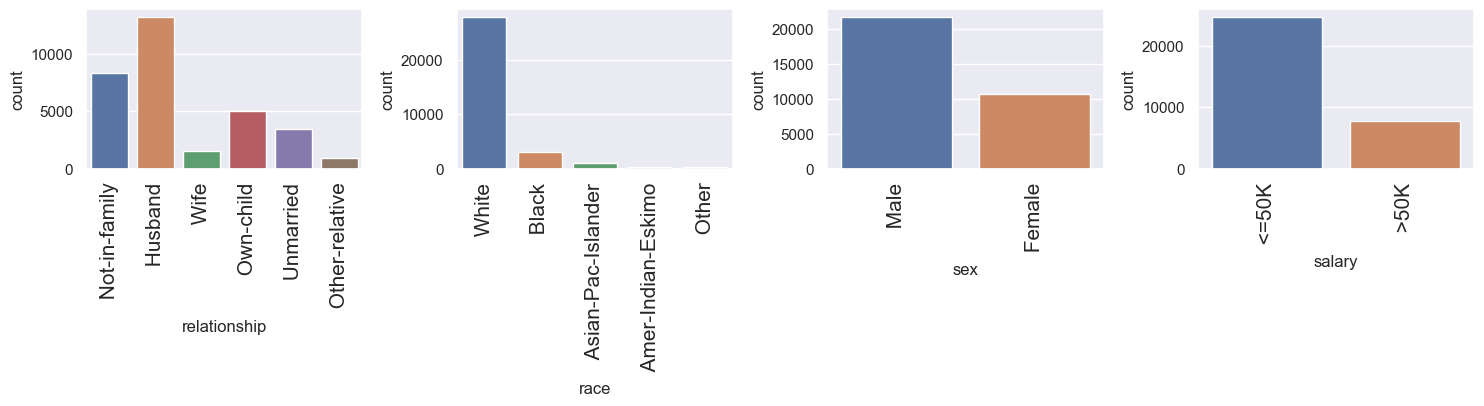

In [34]:
colmns2 = ['relationship', 'race', 'sex', 'salary']

for i in range(0,len(colmns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [35]:
#visualizing numerical_features using distplot

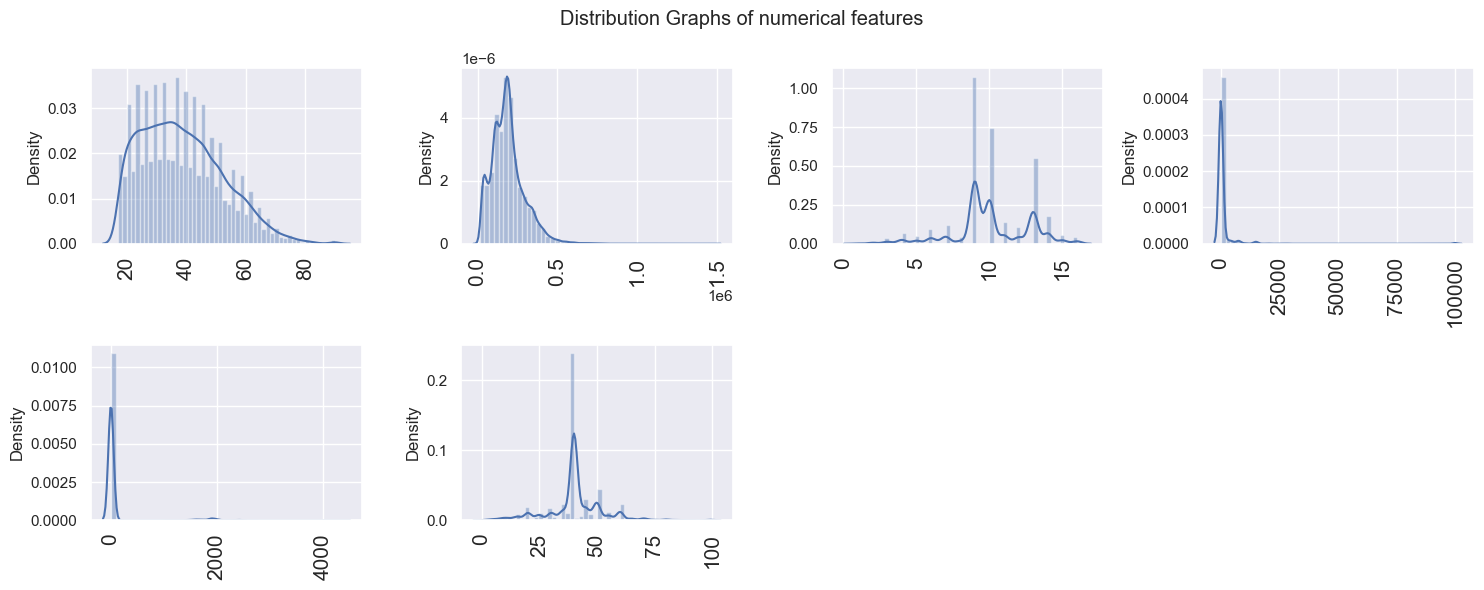

In [36]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

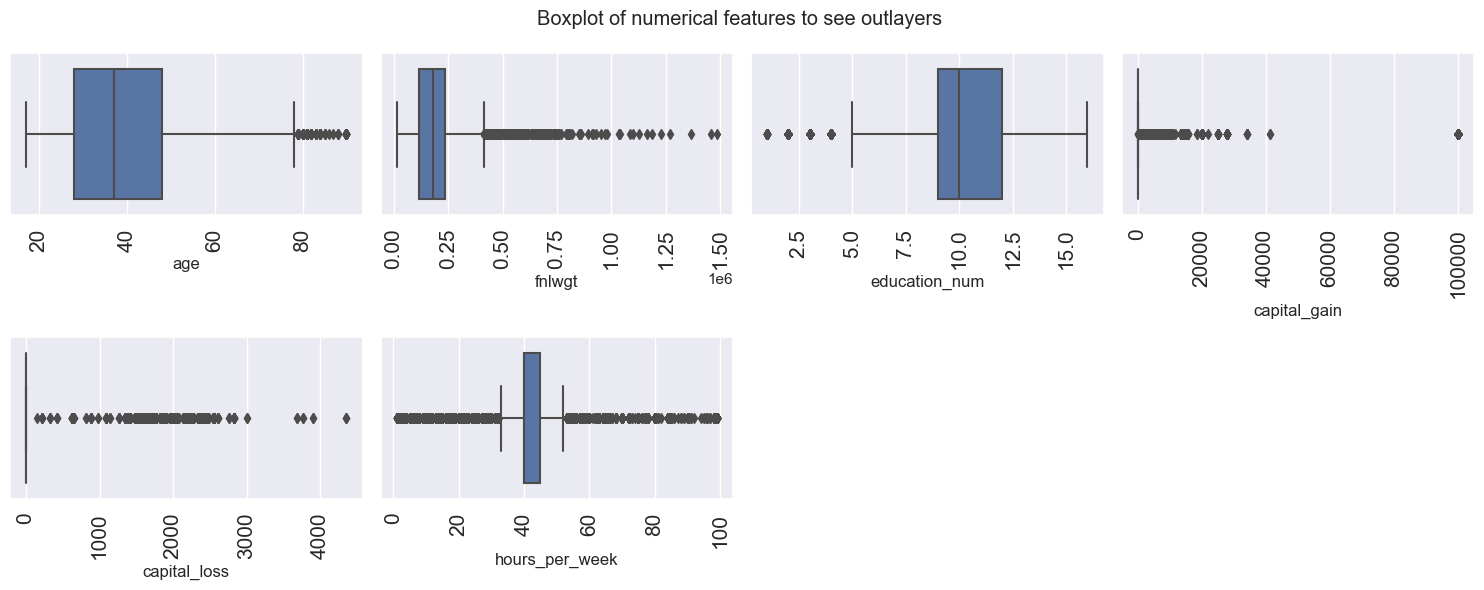

In [37]:
#FOR CHECKING OUTLIERS WE ARE VISULAIZING DATA THROUGH BOXPLOT

plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [38]:
from scipy import stats

# Calculate the Z-Scores for each numerical feature
z_scores = stats.zscore(data[numerical_features])

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers for each numerical feature
outliers = (np.abs(z_scores) > threshold)

# Replace outliers with the 1st and 99th percentile values using Winsorization
lower_percentile = 1
upper_percentile = 99

for feature in numerical_features:
    lower_bound = np.percentile(data[feature], lower_percentile)
    upper_bound = np.percentile(data[feature], upper_percentile)
    data.loc[data[feature] < lower_bound, feature] = lower_bound
    data.loc[data[feature] > upper_bound, feature] = upper_bound

# Alternatively, you can remove rows with outliers from the dataframe
# data = data[~outliers.any(axis=1)]

# Print the number of replaced outliers
num_replaced_outliers = outliers.sum()
print(f"Replaced {num_replaced_outliers} outliers using Winsorization.")

# Optional: Reset the index of the dataframe
data = data.reset_index(drop=True)


Replaced age                120
fnlwgt             346
education_num      216
capital_gain       215
capital_loss      1470
hours_per_week     440
dtype: int64 outliers using Winsorization.


<AxesSubplot:xlabel='salary'>

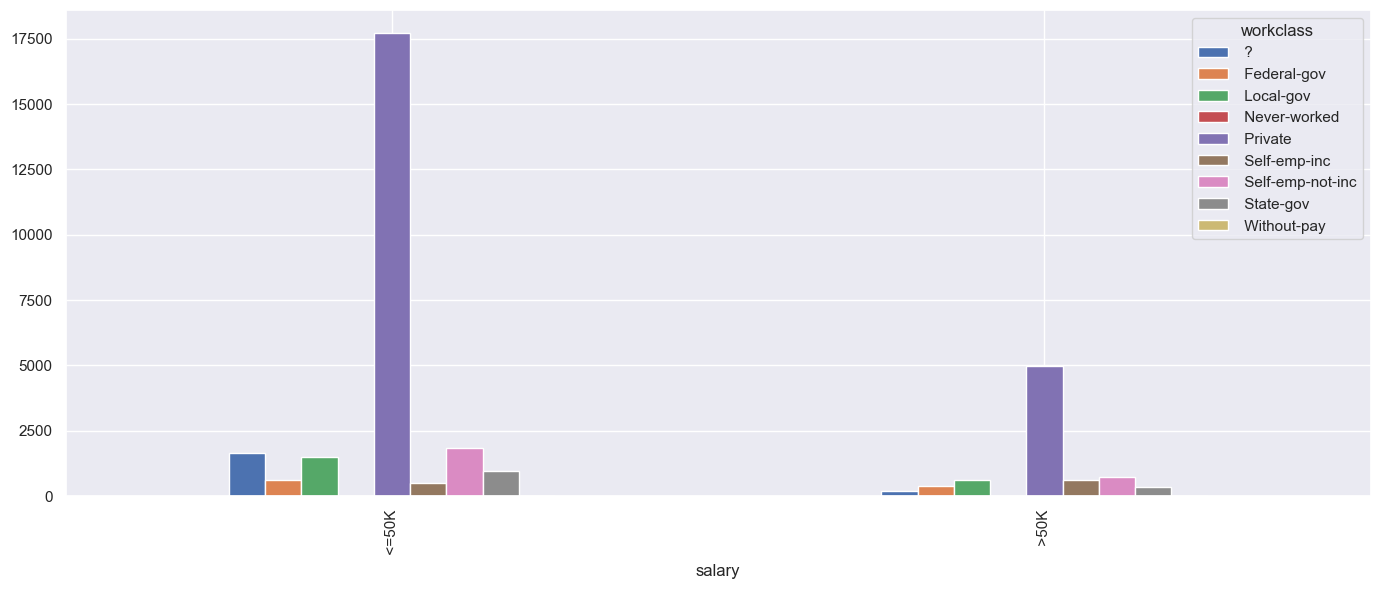

In [39]:
income = pd.crosstab(data['salary'],data['workclass'])
income.plot(kind='bar')

<AxesSubplot:xlabel='salary'>

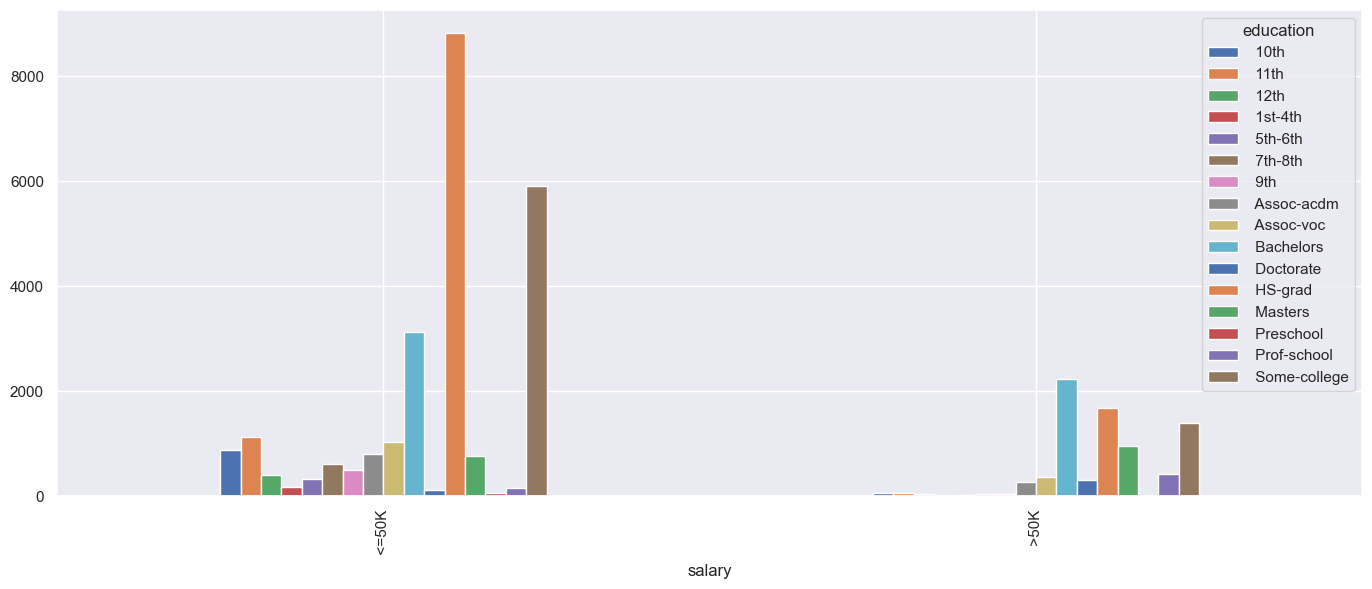

In [40]:
education = pd.crosstab(data['salary'],data['education'])
education.plot(kind="bar")

<AxesSubplot:xlabel='salary'>

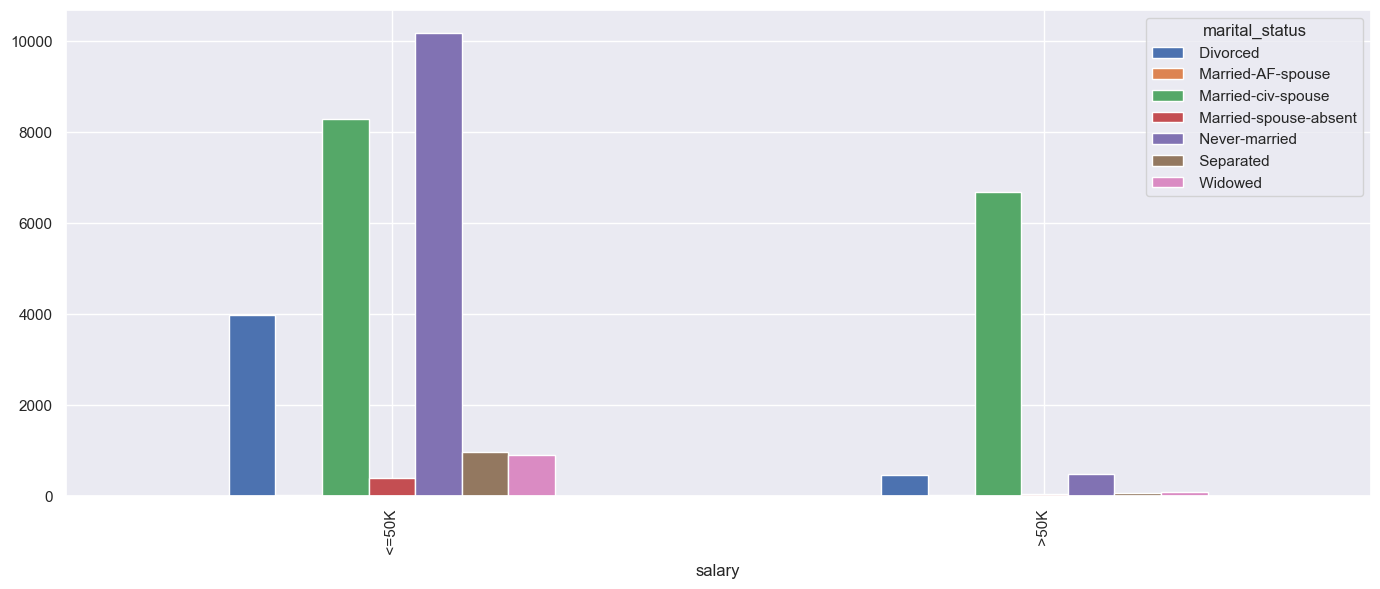

In [41]:
marital = pd.crosstab(data['salary'],data['marital_status'])
marital.plot(kind="bar")

<AxesSubplot:xlabel='salary'>

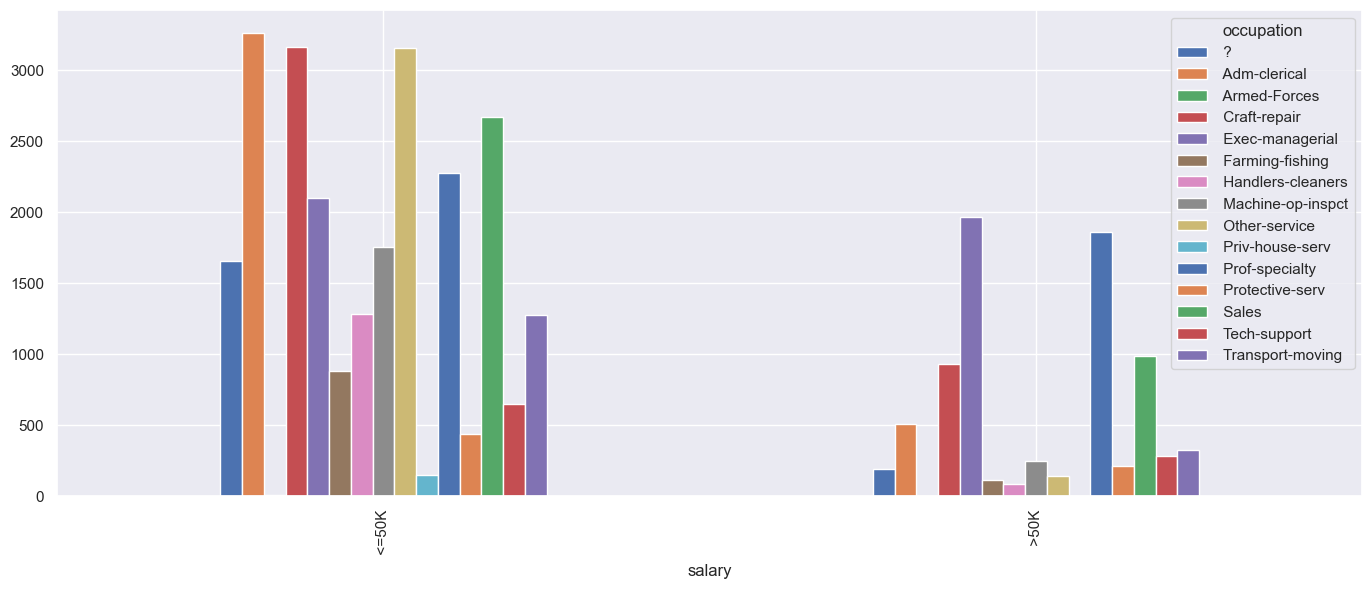

In [42]:
occupation = pd.crosstab(data['salary'],data['occupation'])
occupation.plot(kind="bar")

<AxesSubplot:xlabel='salary'>

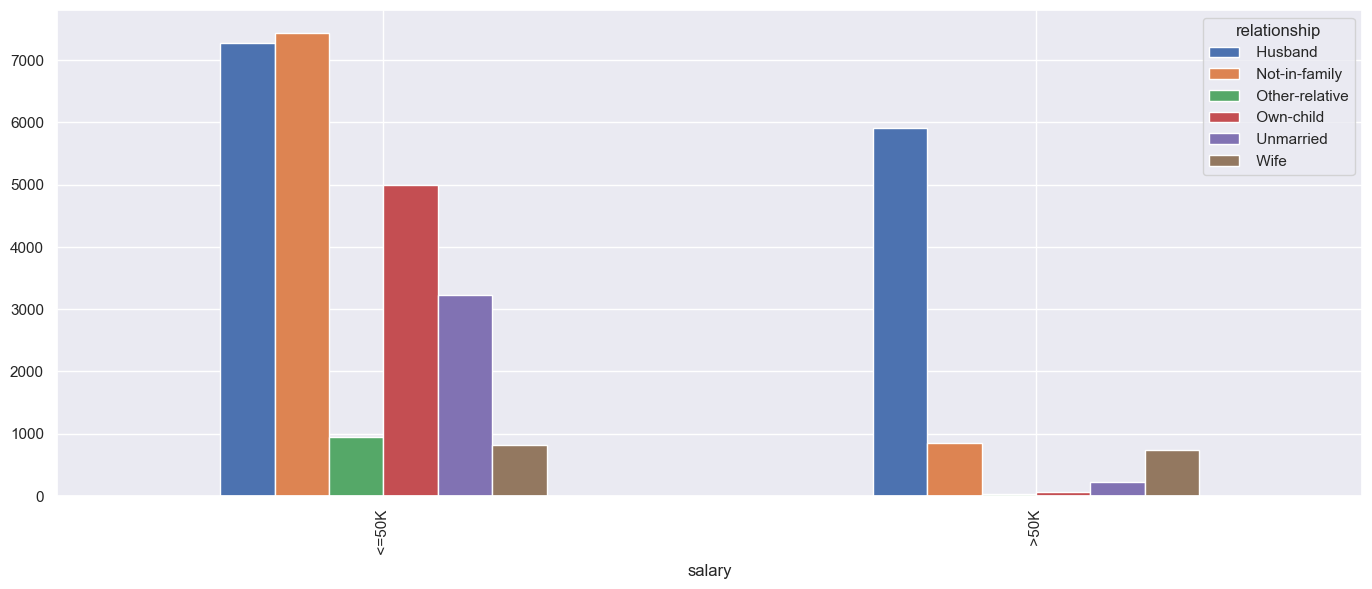

In [43]:
relationship = pd.crosstab(data['salary'],data['relationship'])
relationship.plot(kind="bar")

<AxesSubplot:xlabel='salary'>

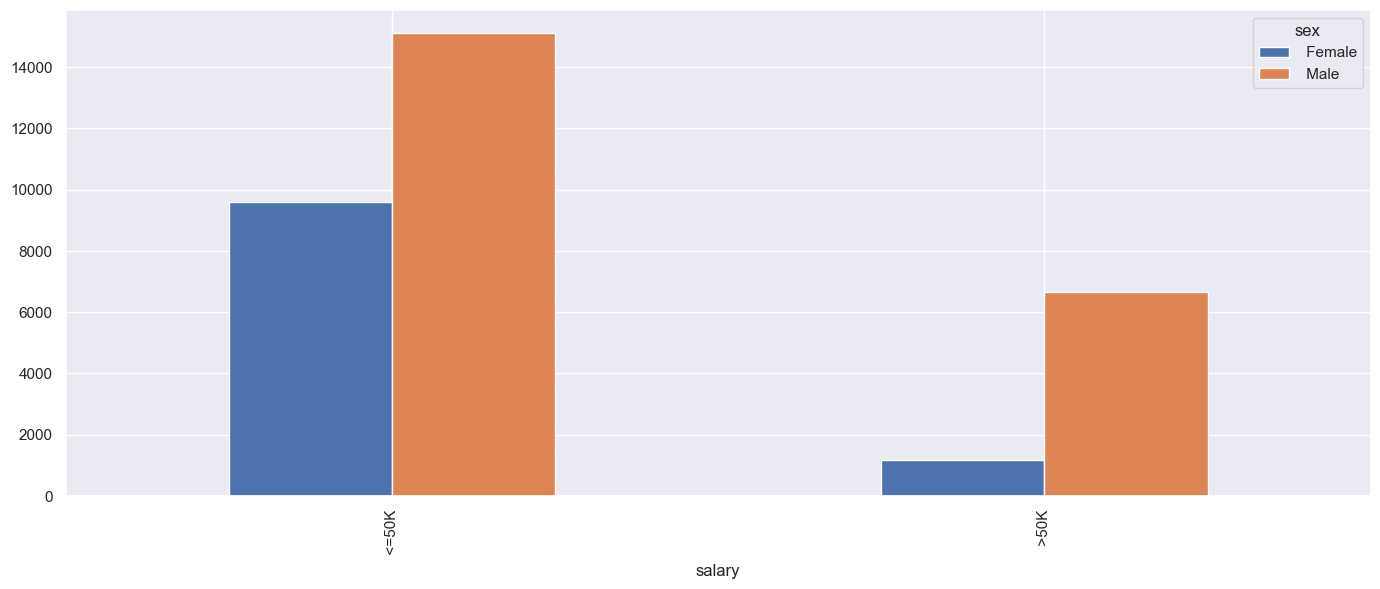

In [44]:
sex = pd.crosstab(data['salary'],data['sex'])
sex.plot(kind="bar")

In [45]:
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

In [46]:
data['salary'] 

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32532     <=50K
32533      >50K
32534     <=50K
32535     <=50K
32536      >50K
Name: salary, Length: 32537, dtype: object

In [48]:
data["salary"] = data["salary"].map({'<=50K':0, '>50K':1})

In [49]:
data['salary']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32532   NaN
32533   NaN
32534   NaN
32535   NaN
32536   NaN
Name: salary, Length: 32537, dtype: float64

In [1]:
# converting categorical columns to numerical columns using OHE

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ohe = OneHotEncoder()
le = LabelEncoder()

categorical_columns = ['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country']

for column in categorical_columns:
    le.fit(data[column])
    data[column] = le.transform(data[column])

NameError: name 'data' is not defined

In [ ]:
data["salary"] = data["salary"].map({'<=50K':0, '>50K':1})

In [ ]:
data["salary"]

In [ ]:
sns.heatmap(data.corr(), annot=True
            )

In [ ]:
# droping education_num column because we have education ordinal encorded one
data.drop(["education","fnlwgt", "country"],axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
data.to_csv("cleandata.csv",index=False)

In [ ]:
#model training
data.shape

In [ ]:
x = data.drop("salary", axis = 1)
y = data['salary']

In [ ]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [ ]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

) # to standardize the data values into a standard format.

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

# apply transform to particular columns. 
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def performance_metrices(test,predict):
    confusionmatrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmatrix,precision,recall,f1score,accuracyscore

In [ ]:
# use hyperparameter tuning

In [ ]:
lr = LogisticRegression()

In [ ]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
    
}

In [ ]:
grid = GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=-1, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
y_train.unique()

In [ ]:
data['salary']